![alt text](https://anvaqta.id/headerai.jpg)

# Fine Tuning CNN

---
## Kenapa Perlu Fine Tuning?
Fine tuning sangat penting untuk meningkatkan akurasi model dan juga mengeneralisasi data input. Fine tuning juga berguna untuk menghindari overfitting

---
## Dataset
Dataset pun juga perlu dilakukan preproses agar akurasi model menjadi lebih baik. beberapa metode Normalisasi dataset yaitu



1.   Zero-Center
2.   Range [0,1]
3.   Zero Center dengan range [-1,1]


---
## Fungsi Aktivasi



---
### Sigmoid

fungsi sigmoid memiliki rentang output antara [0, 1]. Fungsi sigmoid cocok digunakan sebagai layer output untuk binary classifier

![alt text](https://miro.medium.com/max/4000/1*JHWL_71qml0kP_Imyx4zBg.png)

---
### ReLU

fungsi ReLU cocok digunakan untuk fungsi aktivasi karena biasanya akan menghasilkan akurasi yang tinggi

![alt text](https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png)

---
### Tanh

Tanh mirip seperti sigmoid dan lebih cepat dari sigmoid karena tidak adanya perhitungan eksponensial

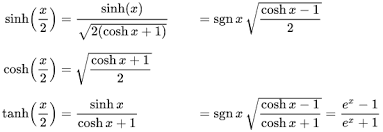

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/1280px-Hyperbolic_Tangent.svg.png)

---
### Softmax

Softmax merupakan sebuah fungsi aktivasi yang digunakan untuk menghitung loss dari model yang memiliki lebih dari 1 kelas, biasanya digunakan untuk output yang one hot matrix

![alt text](https://ljvmiranda921.github.io/assets/png/cs231n-ann/softmax.png)

---
## Loss Function


1.   Mean Squared Error => Cocok untuk data regresi
2.   Categorical Crossentropy => Cocok untuk data yang memiliki banyak label
3.   Binary Crossentropy => Cocok untuk data biner



---
## Learning Rate & Decay

**Learning rate** adalah hyperparameter yang bertugas mengurangi gradient yang akan ditambahkan kebobot dengan tujuan memperlambat proses learning sehingga diharapkan bisa mencapai global optimum

**Decay** merupakan sebuah hyperparameter yang bertujuan untuk mengurangi nilai dari learning rate setiap **n** epochs

---
# Let's Code
Seperti biasa, install `tensorflow 2`

In [0]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
tf.__version__

Import library yang diperlukan

In [0]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np

---
## Load Dataset

In [0]:
(X_train_raw, y_train), (X_test_raw, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
class_num = len(class_names)

---
## Prepocessing
Normalisasi nilai piksel menjadi antara 0 dan 1

In [0]:
# Bagi X_train_raw dan X_test_raw dengan 255.0
X_train = X_train_raw/255.0
X_test = X_test_raw/255.0

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

---
## Visualisasi Dataset

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_raw[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

---
## One Hot Matriks Label

In [0]:
# gunakan fungsi to_categorical untuk membuat one hot matriks
y_train_hot = to_categorical(y_train, class_num)
y_test_hot = to_categorical(y_test, class_num)

---
## Bagi Data Validasi dan Data Train

In [0]:
X_val = X_train[-10000:,:]
y_val = y_train_hot[-10000:]

X_train = X_train[:-10000, :]
y_train_hot = y_train_hot[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train_hot.shape)

## Membuat Model CNN

In [0]:
def buat_model():
  model = Sequential([
        # Buat layer Conv2D dengan 64 filter berukuran 3x3, input_shape (32,32,3) dang fungsi aktivasi relu
        Conv2D(64, (3,3), input_shape=(32,32,3), activation='relu'),
        # Buat layer MaxPooling2D dengan ukuran filter 2x2
        MaxPooling2D((2,2)),
        # Buat layer Conv2D dengan 64 filter berukuran 3x3 dan fungsi aktivasi relu
        Conv2D(64, (3,3), activation='relu'),
        # Buat layer Maxpoolin2D dengan ukuran filter 2x2
        MaxPooling2D((2,2)),
        # Buat layer Flatten
        Flatten(),
        # Buat layer Dense dengan 64 neuron dan fungsi aktivasi relu
        Dense(64, activation='relu'),
        # Buat layer output Dense dengan 10 neuron dan fungsi aktivasi softmax
        Dense(class_num, activation='softmax')
  ])
  return model
model = buat_model()
model.summary()

---
## Inisialisasi Hyperparameter

In [0]:
num_epochs = 10
batch_size = 1000
history = {}
scores = {}

---
# Optimizers API

Gradient descent is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks. 

At the same time, every state-of-the-art Deep Learning library contains implementations of various algorithms to optimize gradient descent.

<br>


<center>
<img src='http://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif' height=300><br><img src='https://image.ibb.co/gHFUTz/opt2.gif' height=250>
<img src='https://miro.medium.com/max/1240/1*Y2KPVGrVX9MQkeI8Yjy59Q.gif' height=250>
  
  
</center>

<br>


For the next vanilla SGD, we give you the implementation as you've implement it many times before.

But now we write it as a function, so <font color='red'>**Observe carefully**</font> how the implementation is done. 

Then complete the next exercises with similar implementation

---
## Stochastic Gradient Descent

The most basic optimization in Neural Network
<center>
<img src='https://image.ibb.co/em1Q1K/sgd.png' width=700>
</center>

<br>


<table> 
  <tr>
    <td>
      <font size=2>
        perform gradient update
      </font></td>
    <td>:</td>
    <td><font size=3>
      $$
      \begin{align}
      W_{t+1}=W_t - \alpha\nabla f(W_t)
      \end{align}
      $$</font>
    </td>
  </tr>
</table>

<br>

<table> 
  <tr>
    <td><font size=3>
      $$
      \begin{align}
      \alpha\\W_t
      \end{align}
      $$ </font>
    </td>
    <td><font size=2>
      <pre>(lr) learning rate<br><br>(w)  old weight</pre>  </font>    
    </td>    
    <td>|<br>|<br>|<br>|</td>
    <td><font size=3>
      $$
      \begin{align}
      W_{t+1}\\\nabla f(W_t)
      \end{align}
      $$ </font>
    </td>
    <td><font size=2>
      <pre>(new_w) new weight<br><br>(grad)  weight gradient </pre>  </font>    
    </td>
  </tr>
</table>




In [0]:
# Buat optimizer SGD dengan learning rate 0.01 dan decay 1e-6
sgd = SGD(learning_rate=0.01, decay=1e-6)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history['sgd'] = model.fit(X_train, y_train_hot,
                           validation_data=(X_val, y_val),
                           epochs=num_epochs,
                           batch_size=batch_size,
                           verbose=2)


---
## Hitung Score Model SGD

In [0]:
scores['sgd'] = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores['sgd'][1]*100))

---
## Root Mean Square Propagation (RMSprop)

RMSprop is an unpublished, adaptive learning rate method proposed by Geoff Hinton in [Lecture 6e of his Coursera Class](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf).

It’s famous for not being published, yet being very well-known; most deep learning framework include the implementation of it out of the box.

RMSprop and Adadelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates


---
The basic formula for RMSProp Update is as follow:


<br>

<table> 
  <tr>
    <td>
      <font size=2>
        calculate new decayed<br> gradient build-up<br><br><br>
        perform rmsprop update
      </font></td>
    <td>:<br><br><br><br>:</td>
    <td>
      <font size=3>
        $$
        \begin{align}
        \\g_t &= \gamma\ g_{t-1} + (1-\gamma)\ \nabla f(W_t)^2\\\\
        W_{t+1}&=W_t -\frac{\alpha}{\sqrt{g_t}+\epsilon}\nabla f(W_t)\\
        \end{align}
        $$</font>
    </td>
  </tr>
</table>

<br>


<table> 
  <tr>
    <td><font size=3>
      $$
      \begin{align}
      g_t\\\gamma\\\alpha\\\epsilon
      \end{align}
      $$ </font>
    </td>
    <td><font size=2>
      <pre>(gt)  gradient build-up<br><br>(dr)  decay rate<br><br>(lr)  learning rate<br><br>(e)   epsilon </pre>  </font>    
    </td>
    <td>|<br>|<br>|<br>|<br>|<br>|</td>
    <td><font size=3>
      $$
      \begin{align}
      W_t\\W_{t+1}\\\nabla f(W_t)
      \end{align}
      $$ </font>
    </td>
    <td><font size=2>
      <pre>(w)     old weight<br><br>(new_w) new weight<br><br>(grad)  weight gradient </pre>  </font>    
    </td>
  </tr>
</table>

In [0]:
# Buat optimizer rmsprop dengan learning_rate 0.001
rmsprop = RMSprop(learning_rate=0.001)
model = buat_model()
model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])
history['rmsprop'] = model.fit(X_train, y_train_hot,
                           validation_data=(X_val, y_val),
                           epochs=num_epochs,
                           batch_size=batch_size,
                           verbose=2)

---
## Hitung Score Model RMSprop

In [0]:
scores['rmsprop'] = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores['rmsprop'][1]*100))

---
## Adaptive Moment Estimation Optimizer (Adam)

ADAM is another method that computes adaptive learning rates for each parameter. 

In addition to storing an exponentially decaying average of past squared gradients vt like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients mt, similar to momentum.

Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface. 


[Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)


---
The basic formula for ADAM Update is as follow:


<br>

<table> 
  <tr>
    <td>
      <font size=2>
        first moment (mean)<br> build-up<br><br><br>
        second moment (variance)<br>build-up<br><br><br><br>
        bias correction<br><br><br><br><br>
        perform adam update<br><br>
      </font></td>
    <td>:<br><br><br><br><br>:<br><br><br><br><br>:<br><br><br><br><br>:<br><br></td>
    <td>
      <font size=3>
        $$
        \begin{align}
        m_t &= \beta_1\ m_{t-1} + (1-\beta_1)\ \nabla f(W_t)\\\\
        v_t &= \beta_2\ v_{t-1} + (1-\beta_2)\ \nabla f(W_t)^2\\\\
        \hat{m_t}&=\frac{m_t}{1-(\beta_1)^t} \ \ ;\ \ 
        \hat{v_t} =\frac{v_t}{1-(\beta_2)^t}\\\\
        W_{t+1}&=W_t -\frac{\alpha}{\sqrt{\hat{v_t}}+\epsilon}\hat{m_t}
        \end{align}
$$</font>
    </td>
  </tr>
</table>

<br>


<table> 
  <tr>
    <td><font size=3>
      $$
      \begin{align}
      \beta_1\\\beta_2\\m_t\\v_t\\\hat{m_t}\\\hat{v_t}
      \end{align}
      $$ </font>
    </td>
    <td><font size=2>
      <pre>(beta1) beta mean<br><br>(beta2) beta variance<br><br>(m)     1st moment (mean) buildup<br><br>(v)     2nd moment (variance) buildup<br><br>(mb)    1st moment (mean) bias<br><br>(mv)    2nd moment (variance) bias</pre>  </font>    
    </td>
    <td>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|</td>
    <td><font size=3>
      $$
      \begin{align}
      \alpha\\\epsilon\\W_t\\W_{t+1}\\\nabla f(W_t)
      \end{align}
      $$ </font>
    </td>
    <td><font size=2>
      <pre>(lr)    learning rate<br><br>(e)     epsilon <br><br>(w)     old weight<br><br>(new_w) new weight<br><br>(grad)  weight gradient </pre>  </font>    
    </td>
  </tr>
</table>

In [0]:
# Buat optimizer adam dengan learning_rate 0.001, beta_1=0.9, beta_2=0.999
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model = buat_model()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history['adam'] = model.fit(X_train, y_train_hot,
                           validation_data=(X_val, y_val),
                           epochs=num_epochs,
                           batch_size=batch_size,
                           verbose=2)

---
## Hitung Score Model Adam

In [0]:
scores['adam'] = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores['adam'][1]*100))

---
## Perbandingan Loss dan Akurasi Tiap Optimizer

In [0]:
fig, ax = plt.subplots(1,2,figsize=(18,3))

ax[0].plot(history['sgd'].history['loss'])
ax[0].plot(history['rmsprop'].history['loss'])
ax[0].plot(history['adam'].history['loss'])
ax[0].set_title('Train Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['SGD', 'RMSprop', 'Adam'], loc='upper right')

ax[1].plot(history['sgd'].history['accuracy'])
ax[1].plot(history['rmsprop'].history['accuracy'])
ax[1].plot(history['adam'].history['accuracy'])
ax[1].set_title('Train Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['SGD', 'RMSprop', 'Adam'], loc='upper right')
plt.show()

---
## Perbandingan Akurasi

In [0]:
print('SGD Accuracy: %.2f%%' % (scores['sgd'][1]*100))
print('RMSprop Accuracy: %.2f%%' % (scores['rmsprop'][1]*100))
print('Adam Accuracy: %.2f%%' % (scores['adam'][1]*100))

---
# Dropout Layer

Dropout [1] is a technique for regularizing neural networks by **randomly** setting some features to **zero** during the forward pass of training. 

<center>
<img src="https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png" width=500>
 </center>

In this exercise you will implement a dropout layer and modify your fully-connected network to optionally use dropout.

[1] [Geoffrey E. Hinton et al, "Improving neural networks by preventing co-adaptation of feature detectors", arXiv 2012](https://arxiv.org/abs/1207.0580)

---
## Mari Buat Modelnya

---
### Tanpa Dropout

In [0]:
def buat_model_tanpa_dropout():
  model = Sequential([
          # Buat layer Flatten dengan input_shape 32x32x3
          Flatten(input_shape=(32,32,3)),
          # Buat layer Dense dengan 500 neuron dan fungsi aktivasi relu
          Dense(500, activation='relu'),
          # Buat layer Dense dengan 500 neuron dan fungsi aktivasi relu
          Dense(500, activation='relu'),
          # Buat layer Dense dengan 500 neuron dan fungsi aktivasi relu
          Dense(500, activation='relu'),
          # Buat layer Dense dengan 10 neuron dan fungsi aktivasi softmax
          Dense(10, activation='softmax')
  ])
  return model
model_tanpa_dropout = buat_model_tanpa_dropout()
model_tanpa_dropout.summary()

---
### Train Modelnya

In [0]:
# set loss nya menggunakan categorical_crossentropy
model_tanpa_dropout.compile(optimizer='adam', loss=??, metrics=['accuracy'])
history_tanpa_dropout = model_tanpa_dropout.fit(X_train, y_train_hot,
                                                validation_data=(X_val, y_val),
                                                epochs=10,
                                                batch_size=1000,
                                                verbose=2)

In [0]:
akurasi_tanpa_dropout = model_tanpa_dropout.evaluate(X_test, y_test_hot)
print('Akurasi : %.2f%%' % (akurasi_tanpa_dropout[1]*100))

---
### Dengan Dropout

In [0]:
def buat_model_dropout():
  model = Sequential([
          # Buat layer Flatten dengan input_shape 32x32x3
          Flatten(input_shape=(32,32,3)),
          # Buat layer Dense dengan 500 neuron dan fungsi aktivasi relu
          Dense(500, activation='relu'),
          # Buat Dropout dengan probability 0.5
          Dropout(0.5),
          # Buat layer Dense dengan 500 neuron dan fungsi aktivasi relu
          Dense(500, activation='relu'),
          # Buat Dropout dengan probability 0.5
          Dropout(0.5),
          # Buat layer Dense dengan 500 neuron dan fungsi aktivasi relu
          Dense(500, activation='relu'),
          # Buat Dropout dengan probability 0.5
          Dropout(0.5),
          # Buat layer Dense dengan 10 neuron dan fungsi aktivasi softmax
          Dense(10, activation='softmax')
  ])
  return model
model_dropout = buat_model_dropout()
model_dropout.summary()

---
### Train Modelnya

In [0]:
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model_dropout = model_dropout.fit(X_train, y_train_hot,
                                          validation_data=(X_val, y_val),
                                          epochs=10,
                                          batch_size=1000,
                                          verbose=2)

---
### Hitung Evaluasinya

In [0]:
score_dropout = model_dropout.evaluate(X_test, y_test_hot)
print('Akurasi : %2.f%%' % (score_dropout[1]*100))

---
## Bandingkan Hasilnya

In [0]:
fig, ax = plt.subplots(1,2,figsize=(18,3))

ax[0].plot(history_tanpa_dropout.history['loss'])
ax[0].plot(history_model_dropout.history['loss'])
ax[0].set_title('Train Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Tanpa Dropout', 'Dengan Dropout'], loc='upper right')

ax[1].plot(history_tanpa_dropout.history['accuracy'])
ax[1].plot(history_model_dropout.history['accuracy'])
ax[1].set_title('Train Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Tanpa Dropout', 'Dengan Dropout'], loc='lower right')
plt.show()

---
## Perbandingan Akurasi

In [0]:
fig, ax = plt.subplots(1,2,figsize=(18,3))

ax[0].plot(history_tanpa_dropout.history['accuracy'])
ax[0].plot(history_tanpa_dropout.history['val_accuracy'])
ax[0].set_title('Tanpa Dropout')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train Accuracy', 'Val Accuracy'], loc='lower right')

ax[1].plot(history_model_dropout.history['accuracy'])
ax[1].plot(history_model_dropout.history['val_accuracy'])
ax[1].set_title('Dengan Dropout')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train Accuracy', 'Val Accuracy'], loc='lower right')
plt.show()

*copyright © 2019 Artificial intelligence laboratory all right reserved.*